#### 機械学習のための Numpy, Scipy

In [38]:
import numpy as np

"""基本情報"""
x = np.array([[1,4],[3,3]])
print(x)
print(type(x))  
print(x.shape) # 次元をタプルで返す
print(x.size) # 全要素数
print(x.ndim) # 配列の次元数
print(x.dtype) # 配列のデータ型
print(x.nbytes) # 消費バイト数

[[1 4]
 [3 3]]
<class 'numpy.ndarray'>
(2, 2)
4
2
int32
16


In [39]:
"""行列式で判定　結果が0の場合は逆行列を持たない ※xは正方行列（行数と列数が等しい行列）の必要がある"""
np.linalg.det(x)

-9.000000000000002

In [40]:
"""逆行列
※xは正方行列（行数と列数が等しい行列）の必要がある
※回帰分析で使われる
"""
x_t = np.linalg.inv(x) 
x_t

array([[-0.33333333,  0.44444444],
       [ 0.33333333, -0.11111111]])

In [41]:
"""行列とその逆行列の積は単位行列となる"""
i = x.dot(x_t)
i

array([[1., 0.],
       [0., 1.]])

In [42]:
"""単位行列はこのようにも作れる"""
i = np.identity(2)
i

array([[1., 0.],
       [0., 1.]])

In [43]:
"""行列ｘに単位行列を掛けると結果はｘに等しくなる"""
x.dot(i)

array([[1., 4.],
       [3., 3.]])

In [44]:
"""消費バイト数比較  (-2147483647 < 扱う数字 < 2147483648) なら int32で十分でしょう"""
x = np.array([[1,2,3],[4,5,6]], dtype = np.uint32) # uint（符号なし整数）
print(x.nbytes)
x = np.array([[1,2,3],[4,5,6]], dtype = np.float)
print(x.nbytes)
x = np.array([[1,2,3],[4,5,6]], dtype = np.complex)
print(x.nbytes)
x = np.array([[1,2,3],[4,5,6]], dtype = np.int64)
print(x.nbytes)

""" int32 int64 の違いって何？
整数のタイプごとに、異なる範囲のストレージ容量がある
Int16 -- 2バイト-- (-32,768 to +32,767)
Int32 -- 4バイト-- (-2,147,483,648 to +2,147,483,647)
Int64 -- 8バイト-- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)
"""

24
48
96
48


' int32 int64 の違いって何？\n整数のタイプごとに、異なる範囲のストレージ容量がある\nInt16 -- 2バイト-- (-32,768 to +32,767)\nInt32 -- 4バイト-- (-2,147,483,648 to +2,147,483,647)\nInt64 -- 8バイト-- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)\n'

In [45]:
"""astype属性を使い新たなdtypeの配列にコピー"""
x = np.array([[1,2,3],[4,5,6]], dtype = np.uint32) 
x_copy_int = x.astype(np.float)
print(x_copy_int)
x # 元の配列のdtypeは変わらない

[[1. 2. 3.]
 [4. 5. 6.]]


array([[1, 2, 3],
       [4, 5, 6]], dtype=uint32)

In [46]:
"""
dtypeを変えるだけで配列の大きさが80MBから40MBに縮小する。
その代わり、小数点以下の精度は低くなる。小数点以下16桁から7桁に。
"""
big_data = np.random.rand(100000,100)
print(big_data.nbytes)
big_data_new = big_data.astype(np.float32)
print(big_data_new.nbytes)

80000000
40000000


In [47]:
"""リストではこんな簡単に計算出来なくて、要素を反復する必要が"""
my_list = [2, 14, 6, 8]
my_array = np.asarray(my_list)
my_array + 2 #  

array([ 4, 16,  8, 10])

In [48]:
"""配列作成の便利方法（開始、終了、間隔）"""
x = np.arange(3,7,0.5)
x

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])

In [49]:
"""いくつに分割したいかわかっている場合"""
x = np.linspace(1.2, 40.5, num=20)
x

array([ 1.2       ,  3.26842105,  5.33684211,  7.40526316,  9.47368421,
       11.54210526, 13.61052632, 15.67894737, 17.74736842, 19.81578947,
       21.88421053, 23.95263158, 26.02105263, 28.08947368, 30.15789474,
       32.22631579, 34.29473684, 36.36315789, 38.43157895, 40.5       ])

In [50]:
"""対数スケールの等比等比数列を返す"""
np.geomspace(1, 625, num=5)

array([  1.,   5.,  25., 125., 625.])

In [51]:
"""
開始値と終了値の間を対数スケールで均等に値を並べた配列を返す
下の場合、開始値が10**3で終了値が10**4
"""
np.logspace(3, 4, num=5)

array([ 1000.        ,  1778.27941004,  3162.27766017,  5623.4132519 ,
       10000.        ])

In [52]:
"""上記例のような大きな値を避けるには常用対数を用いる"""
np.logspace(np.log10(3), np.log10(4), num=5)

array([3.        , 3.2237098 , 3.46410162, 3.72241944, 4.        ])

In [53]:
"""配列同士を高速に比較"""
x = np.array([1,2,3,4])
y = np.array([1,2,3,3])
x == y

array([ True,  True,  True, False])

In [54]:
"""2つの配列の全要素同士が一致するか否かを1つの値で返す"""
x = np.array([1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8,9,9,9,9])
y = np.array([1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8,9,9,8,9])
np.array_equal(x,y)

False

In [55]:
x > y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False])

In [56]:
"""論理比較（AND）"""
x = np.array([0, 1, 0, 0], dtype=bool)
y = np.array([1, 1, 0, 1], dtype=bool)
np.logical_and(x,y)

array([False,  True, False, False])

In [57]:
"""論理比較（OR）"""
x = np.array([12,16,57,11])
np.logical_or(x < 13, x > 50)

array([ True, False,  True,  True])

In [58]:
"""指数、三角関数"""
print(np.exp(x))
print(np.sin(x))

[1.62754791e+05 8.88611052e+06 5.68572000e+24 5.98741417e+04]
[-0.53657292 -0.28790332  0.43616476 -0.99999021]


In [59]:
"""行列を希望の形状に"""
x = np.arange(9)
print(x)
y = x.reshape((3, 3))
y

[0 1 2 3 4 5 6 7 8]


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [60]:
"""行列の転置"""
y.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [61]:
"""配列全体あるいは指定した軸沿いの和を返す
axisは作用させる次元を指定する
x軸:axis=0
y軸:axis=1
"""
x = np.arange(9).reshape((3,3))
print(x)
print(np.sum(x))
np.sum(x, axis=0)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
36


array([ 9, 12, 15])

In [62]:
"""配列全体あるいは指定した軸沿いの最小値を返す"""
np.amin(x)

0

In [63]:
"""配列全体あるいは指定した軸沿いの最大値を返す（NAN値を無視する）"""
np.nanmax(x)

8

In [64]:
"""配列全体あるいは指定した軸沿いのパーセンタイルを返す
パーセンタイルって何？
パーセンタイルは、データを大きさ順でならべて100個に区切り、
小さいほうからのどの位置にあるかを見るものです。
50パーセンタイルは、小さいほうから50/100のところにあるデータです。
"""
print(x)
print(np.percentile(x, 80))
print(np.percentile(x, 50))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
6.4
4.0


In [65]:
"""最大値のインデックスを取得"""
x = np.array([1,-21,3,-3])
np.argmax(x)

2

In [66]:
"""配列全体、あるいは指定した軸沿いの平均値を返す"""
x = np.array([[2,3,5],[20,12,4]])
np.mean(x, axis=0)

array([11. ,  7.5,  4.5])

In [67]:
"""配列全体、あるいは指定した軸沿いの中央値を返す"""
np.median(x)

"""中央値って何？
中央値あるいはメジアン、メディアンとは、データや集合の代表値の一つで、
順位が中央である値のこと。ただし、データの大きさが偶数の場合は、中央順位2個の値の算術平均をとる。
例えば5人の年齢10歳、32歳、96歳、100歳、105歳からなるデータの中央値は、順位が上からも下からも3である96（歳）となる。
0歳の子供が2人増えて7人になると、中央値は32歳となる。
"""

'中央値って何？\n中央値あるいはメジアン、メディアンとは、データや集合の代表値の一つで、\n順位が中央である値のこと。ただし、データの大きさが偶数の場合は、中央順位2個の値の算術平均をとる。\n例えば5人の年齢10歳、32歳、96歳、100歳、105歳からなるデータの中央値は、順位が上からも下からも3である96（歳）となる。\n0歳の子供が2人増えて7人になると、中央値は32歳となる。\n'

In [68]:
"""配列全体、あるいは指定した軸沿いの標準偏差を返す"""
np.std(x)

6.394442031083626

In [69]:
"""行列の掛け算はdot()を使う"""
c = np.ones((4, 4))
print(c)
c.dot(c)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


array([[4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]])

In [70]:
"""配列を垂直方向にスタックするvstack、水平方向はhstack、分割はvsplitとhsplit"""
y = np.arange(15).reshape(3,5)
x = np.arange(10).reshape(2,5)
new_array = np.vstack((y,x))
new_array

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9]])

In [90]:
"""各特徴の記述統計量を簡単に得る方法
サンプルサイズ，最小値，最大値，平均値，分散(variance)，歪度，尖度を求める
表示される variance は，デフォルトで ddof=1, numpy.var(x, ddof=1) すなわち，不偏分散
ddof=0 を指定すれば，不偏でない分散を表示
"""
from scipy.stats import describe
x = [1.2, 3.1, 4.6, 2.2, 5.7]
describe(x)

DescribeResult(nobs=5, minmax=(1.2, 5.7), mean=3.3599999999999994, variance=3.2729999999999997, skewness=0.14460191499270095, kurtosis=-1.3684571122281206)

In [91]:
"""各特徴の記述統計量を簡単に得る方法続き"""
x = np.random.rand(100,10)
n, min_max, mean, var, skew, kurt = stats.describe(x)
new_array = np.vstack((mean,var,skew,kurt,min_max[0],min_max[1]))
new_array.T

array([[ 0.50838521,  0.08528404,  0.02206259, -1.18439937,  0.00793173,  0.99992674],
       [ 0.4934906 ,  0.08807178,  0.04800103, -1.14976898,  0.00027947,  0.99860328],
       [ 0.5092604 ,  0.08740689,  0.06279139, -1.16450348,  0.0053322 ,  0.99976035],
       [ 0.52931209,  0.08589447, -0.09795941, -1.27761931,  0.00149871,  0.99612777],
       [ 0.48847782,  0.09018815,  0.01627828, -1.27982877,  0.00058608,  0.99843037],
       [ 0.53792041,  0.07520766, -0.204393  , -1.02232411,  0.00918171,  0.99982914],
       [ 0.50790137,  0.0902882 , -0.11966018, -1.27772171,  0.0205152 ,  0.98869762],
       [ 0.48458937,  0.08244721,  0.04598342, -1.12676268,  0.0014284 ,  0.99432622],
       [ 0.50512398,  0.07146684, -0.00492895, -1.09462277,  0.00816359,  0.99947163],
       [ 0.4586212 ,  0.08498302,  0.1604814 , -1.2271011 ,  0.00741144,  0.98605144]])

In [ ]:
"""NaN値を置換する際にとても便利"""
import numpy.ma as ma

x = np.arange(25, dtype = float).reshape(5,5)
x[x<5] = np.nan
print(x)
# nanを各列の平均値で上書き
np.where(np.isnan(x), ma.array(x, mask=np.isnan(x)).mean(axis=0), x)

[[nan nan nan nan nan]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]]


array([[12.5, 13.5, 14.5, 15.5, 16.5],
       [ 5. ,  6. ,  7. ,  8. ,  9. ],
       [10. , 11. , 12. , 13. , 14. ],
       [15. , 16. , 17. , 18. , 19. ],
       [20. , 21. , 22. , 23. , 24. ]])

In [ ]:
"""多次元配列のインデックス付けとスライス"""
x = np.reshape(np.arange(16),(4,4))
print(x)
print(x[1:3,1:3])
x[[0,1,2],[0,1,3]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 5  6]
 [ 9 10]]


array([ 0,  5, 11])

In [92]:
"""linalg.multi_dot() ２つ以上の配列の掛け算を１つの関数で実行したい場合に最適化で速い
以下のコードで、実行時間を比較
"""
from numpy.linalg import multi_dot
import time

a = np.arange(120000).reshape(400,300)
b = np.arange(150000).reshape(300,500)
c = np.arange(200000).reshape(500,400)

start = time.time()
multi_dot([a,b,c])
ft = time.time()-start
print('Multi_dot tooks', time.time()-start,'seconds.')

start_ft = time.time()
a.dot(b).dot(c)
print('Chain dot tooks', time.time()-start_ft,'seconds.')

Multi_dot tooks 0.17888450622558594 seconds.
Chain dot tooks 0.2568364143371582 seconds.


In [ ]:
"""tensordot()メソッドは、２つのテンソルの縮約に使う。
指定した軸上で２つのテンソルの積の和をとることで、次元を削減する。

"""
a = np.arange(60).reshape(3,4,5)
b = np.arange(24).reshape(4,3,2)
c = np.tensordot(a,b, axes=([1,0],[0,1]))
print(a)
print(b)
c

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


array([[4400, 4730],
       [4532, 4874],
       [4664, 5018],
       [4796, 5162],
       [4928, 5306]])

In [ ]:
"""上記ブロックは以下のコードを計算しているのと同じ"""
d = np.zeros((5, 2))
for i in range(5):
    for j in range(2):
        for k in range(3):
            for l in range(4):
                d[i,j] += a[k,l,i] * b[l,k,j]
d

array([[4400., 4730.],
       [4532., 4874.],
       [4664., 5018.],
       [4796., 5162.],
       [4928., 5306.]])

In [ ]:
"""固有値・固有ベクトルを計算する np.linalg.eig()
固有値・固有ベクトルって何？
https://atarimae.biz/archives/24166
"""
a = np.array([[3,1],[0,2]])
# 固有値をv、固有ベクトルをwに代入
v, w = np.linalg.eig(a)
w

array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]])

In [ ]:
"""PCA:principal component analysis を実行！
「変数が3つ以上ある高次元のデータに対して、より低い次元でデータのばらつきを説明する」手法
"""
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

data = datasets.load_breast_cancer()
cancer = data.data
# fit_transformメソッドで、平均が０、標準偏差が１の分布になるようにする
cancer = StandardScaler().fit_transform(cancer)
cancer.shape

(569, 30)

In [ ]:
"""データがどう変換されたか確認"""
before_transformation = data.data
print(before_transformation[:10,:1])

cancer[:10,:1]

[[17.99]
 [20.57]
 [19.69]
 [11.42]
 [20.29]
 [12.45]
 [18.25]
 [13.71]
 [13.  ]
 [12.46]]


array([[ 1.09706398],
       [ 1.82982061],
       [ 1.57988811],
       [-0.76890929],
       [ 1.75029663],
       [-0.47637467],
       [ 1.17090767],
       [-0.11851678],
       [-0.32016686],
       [-0.47353452]])

##### 標準化の計算式
$$
Z = \frac{x-\mu}{\sigma}\\ 
\quad\\
$$
###### Z：標準化された値   　x：標準化される値（元データにある値）  　 $\mu$：分布の平均  　　$\sigma$：分布の標準偏差


In [ ]:
"""データを変換したら、np.linalg.eig()で固有値と固有ベクトルを計算するために
共分散行列を計算し、続いてそれらを分解に用いる
""" 
convariance_matrix = np.cov(cancer,rowvar=False)
# データセットには30の特徴があるので共分散行列の形状は」(30, 30)になる。
convariance_matrix.shape

(30, 30)

In [ ]:
eig_val_cov, eig_vec_cov = np.linalg.eig(convariance_matrix)
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

In [ ]:
"""除去する固有ベクトルを決定するために、固有値を降べきの順にソート　※「べき」とは指数のこと
結果、大きな固有値を持つ最初の２つの固有ベクトルが、データの分布に関する
情報を最も多く含んでいる
"""
sorted_pairs = eig_pairs.sort(key=lambda x: x[0], reverse=True)
for i in eig_pairs:
    print(i[0])

13.304990794374568
5.701374603726145
2.8229101550062334
1.9841275177302
1.65163324233012
1.2094822398029712
0.676408881700906
0.4774562546895071
0.41762878210781723
0.3513108748817337
0.29443315349116456
0.2616211613661211
0.24178242132831346
0.1572861492175933
0.09430069560105563
0.08000340447737676
0.05950361353043194
0.05271142221014812
0.04956470021298179
0.031214260553066572
0.030025663090428794
0.02748771133890438
0.024383691354590887
0.01808679398430555
0.015508527134418791
0.008192037117606663
0.006912612579184416
0.0015921360011975463
0.0007501214127190039
0.0001332790566640968


In [ ]:
"""より低い次元作業空間を得るために残りを除去する。
最初の2つの固有ベクトルを水平にスタック、この行列と元データの掛け算を行って、
元データを新しい次元数の部分空間へ射影する。
結果、(569,30)から(569,2)へ変換された。これはPCAの処理で28個の特徴が除去されたことを意味する。
"""
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), eig_pairs[1][1].reshape(30,1)))
print(matrix_w.shape)
transformed = matrix_w.T.dot(cancer.T)
transformed = transformed.T
print(transformed[0])
transformed.shape

(30, 2)
[9.19283683 1.94858307]


(569, 2)

In [ ]:
"""上記まで行っていたPCAをscikit-learnを用い、短いコードで行う"""
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA(n_components=2)
x_std = StandardScaler().fit_transform(cancer)
pca.fit_transform(x_std)[0]

array([9.19283683, 1.94858307])

In [ ]:
"""ノルム：端的にはベクトルの長さ　※機械学習アルゴリズムでは特徴空間の距離の計算に用いられる
linalgnorm()メソッドで取得できる。　ordパラメータにはノルムの次数を指定
"""
x = np.array([2,5,9,0])

"""L^0-ノルム　ベクトルの非零要素の個数"""
print(np.linalg.norm(x,ord=0))

"""L^1-ノルム（マンハッタンノルム）用途の一つは平均絶対誤差(MAE:mean-absolute-error)"""
print(np.linalg.norm(x,ord=1))

"""L^2-ノルム（ユークリッドノルム） 用途の一つは平均二乗誤差(MSE:mean-squared-error)"""
print(np.linalg.norm(x,ord=2))


3.0
16.0
10.488088481701515


In [ ]:
"""線形変換：行列によって空間（線形空間）を変形させること・・・面白い！
https://www.headboost.jp/what-is-linear-transformation/

１．変換前も変換後も直線は直線のまま
２．変換前も変換後も原点は変わらず固定
３．すべての直線は平行かつ等間隔
"""



In [ ]:
"""行列式：与えられた行列が表す線形変換の変化率
行列式は正方行列に対してのみ定義されます。
"""
A = np.array([2,3,1,4]).reshape(2,2)
print(A)
np.linalg.det(A)

[[2 3]
 [1 4]]


5.000000000000001

In [ ]:
"""トレース：行列の対角成分の和
何に使うか、また、3次元以上の場合計算過程わからん!! 必要になったら調査
https://www.headboost.jp/numpy-trace/
"""

"""3次元配列の場合、axis=0は「奥行き」、axis=1は「行」、axis=2は「列」です。
そのため、デフォルトのaxis1=0, axis2=1では奥行き方向の要素を1つの軸に、行方向の要素を1つの軸にした
2次元配列の対角線の要素を合計しています。
"""
b = np.arange(27).reshape(3,3,3)
print(b)
np.trace(b)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


array([36, 39, 42])

In [ ]:
"""線形方程式を解く"""
A = np.array([[2,1,2],[3,2,1],[0,1,1]])
B = np.array([8,3,4])
x = np.linalg.solve(A, B)
x

array([-0.2, -0.4,  4.4])

In [ ]:
"""2つの配列を要素ごとに比較する関数で上記線形方程式の結果確認"""
np.allclose(np.dot(A, x), B)

True

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]


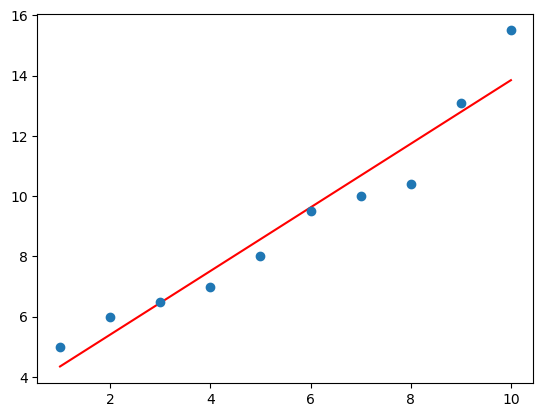

In [102]:
"""線形回帰モデルの可視化
回帰直線：各データ点からの距離の和が最小になる直線
最小二乗解を返すlinalg.lstsq()を用い
重みとバイアス
"""
from numpy import arange,array,ones,linalg
from pylab import plot,show

x = np.arange(1,11)
A = np.vstack([x,np.ones(len(x))])
print(x)
print(A)
A = A.T
print(A)
y = [5, 6, 6.5, 7, 8, 9.5, 10, 10.4, 13.1, 15.5]

w = linalg.lstsq(A,y, rcond=-1)[0]
w

line = w[0]*x + w[1]
plot(x,line,'r-',x,y,'o')
show()

In [11]:
"""ボストン市の住宅価格データセット"""
from sklearn.datasets import load_boston
dataset = load_boston()
samples, label, feature_names = dataset.data, dataset.target, dataset.feature_names
samples.shape

(506, 13)

In [78]:
"""Scipyの統計関数で基本統計量の計算
Scipyのescribe()関数は与えられた配列の記述統計量をいくつも返す。
観測数、最小、最大、平均、分散、歪度、尖度
stats(統計)
"""
from scipy import stats
arr = stats.describe(samples, axis=0)
arr

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

In [79]:
"""上記から基本統計量を個別に計算し、出力する行列にスタックする。"""
minimum = arr.minmax[0]
maximum = arr.minmax[1]
mean = arr.mean
median = np.round(np.median(samples, axis=0), decimals=1)
variance = arr.variance
tenth_percentile = stats.scoreatpercentile(samples, per=10, axis=0)
ninety_percentile = stats.scoreatpercentile(samples, per=90, axis=0)

"""範囲を求めるiqr()関数　データの指定した軸と範囲(rngパラメータを使用)の
四分位範囲を計算します。デフォルトはrng=(25,75)で、関数がデータの
75パーセンタイルと25パーセンタイルの差を計算するという意味"""
rng = stats.iqr(samples, rng=(20,8), axis=0)

"""numpy.get_printoptions() は現在設定されている配列の表示形式を取得する。
この設定は numpy.set_printoptions() を使って変更できる。
デフォルト設定 (suppress=False) では、0.0001 より小さな値は指数表記となる。
suppress=True に設定すると、常に小数表記となる。
linewidth は一行に表示する文字数。
"""
np.set_printoptions(suppress=True, linewidth=125)


"""np.round関数は四捨五入を行う関数 ※「0.5が0になる」のような落とし穴もある
decimals=1で小数点第2位を四捨五入する
"""
Basic_Statistics = np.round(np.vstack((minimum,maximum,rng,mean,median,variance,tenth_percentile,ninety_percentile)), decimals=1)

Basic_Statistics.shape

(8, 13)

In [80]:
stat_labels = ['minm', 'maxm', 'rang', 'mean', 'medi', 'vari', '10%t', '90%t']
print("           F1     F2     F3     F4     F5     F6     F7     F8     F9     F10     F11     F12     F13")
for stat_labels , row in zip(stat_labels, Basic_Statistics):
    print('%s [%s]' % (stat_labels, ''.join('%07s' % i for i in row)))

           F1     F2     F3     F4     F5     F6     F7     F8     F9     F10     F11     F12     F13
minm [    0.0    0.0    0.5    0.0    0.4    3.6    2.9    1.1    1.0  187.0   12.6    0.3    1.7]
maxm [   89.0  100.0   27.7    1.0    0.9    8.8  100.0   12.1   24.0  711.0   22.0  396.9   38.0]
rang [    0.0    0.0    1.9    0.0    0.0    0.4   16.2    0.4    2.0   49.0    1.9  134.7    1.8]
mean [    3.6   11.4   11.1    0.1    0.6    6.3   68.6    3.8    9.5  408.2   18.5  356.7   12.7]
medi [    0.3    0.0    9.7    0.0    0.5    6.2   77.5    3.2    5.0  330.0   19.0  391.4   11.4]
vari [   74.0  543.9   47.1    0.1    0.0    0.5  792.4    4.4   75.828404.8    4.7 8334.8   51.0]
10%t [    0.0    0.0    2.9    0.0    0.4    5.6   27.0    1.6    3.0  233.0   14.8  290.3    4.7]
90%t [   10.8   42.5   19.6    0.0    0.7    7.2   98.8    6.8   24.0  666.0   20.9  396.9   23.0]


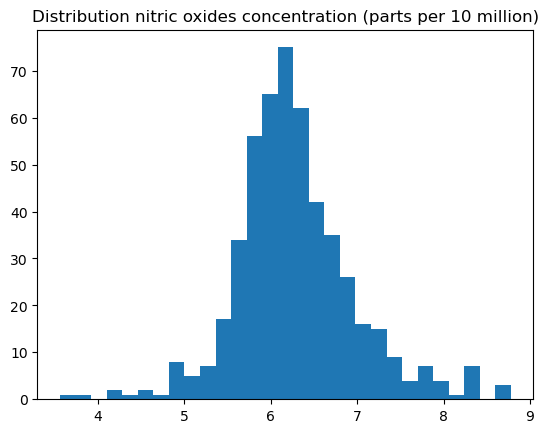

In [101]:

import matplotlib.pyplot as plt
%matplotlib inline

NOX = samples[:,5:6]
plt.hist(NOX,bins ='auto')
plt.title("Distribution nitric oxides concentration (parts per 10 million)")
plt.show()

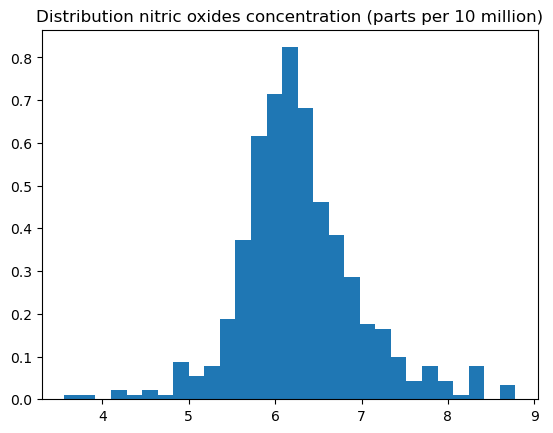

In [110]:
"""dednsity(密度)=True を設定し、ビンに含まれる値の個数の全体に対する割合を表示"""
plt.hist(NOX,bins ='auto', density = True)
plt.title("Distribution nitric oxides concentration (parts per 10 million)")
plt.show()

Bin Sizes
[ 1.  1.  0.  2.  1.  2.  1.  8.  5.  7. 17. 34. 56. 65. 75. 62. 42. 35. 26. 16. 15.  9.  4.  7.  4.  1.  7.  0.  3.]
Bin Edges
[3.561      3.74096552 3.92093103 4.10089655 4.28086207 4.46082759 4.6407931  4.82075862 5.00072414 5.18068966 5.36065517
 5.54062069 5.72058621 5.90055172 6.08051724 6.26048276 6.44044828 6.62041379 6.80037931 6.98034483 7.16031034 7.34027586
 7.52024138 7.7002069  7.88017241 8.06013793 8.24010345 8.42006897 8.60003448 8.78      ]


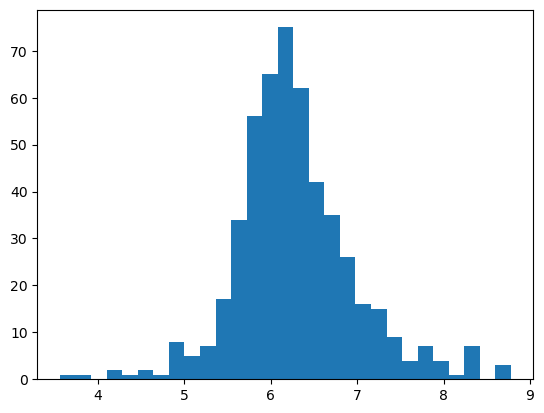

In [107]:
"""ビンのサイズと境界値の表示
1番目の便のサイズは1、つまりこのビンに含まれる値が1個
区間は3.561から3.74096552まで。
このままでは見づらいので、下で改善。
"""
n, bins, paches = plt.hist(NOX,bins ='auto')
print('Bin Sizes')
print(n)
print('Bin Edges')
print(bins)

In [112]:
"""上を見やすく改善"""
bins_string = bins.astype(np.str)
n_string = n.astype(np.str)
lists = []
for i in range(0, len(bins_string)-1):
    c = bins_string[i]+ "-" + bins_string[i+1]
    lists.append(c)
new_bins = np.asarray(lists)
Stacked_Bins = np.vstack((new_bins, n_string)).T
Stacked_Bins


array([['3.561-3.740965517241379', '1.0'],
       ['3.740965517241379-3.9209310344827584', '1.0'],
       ['3.9209310344827584-4.100896551724138', '0.0'],
       ['4.100896551724138-4.280862068965517', '2.0'],
       ['4.280862068965517-4.4608275862068965', '1.0'],
       ['4.4608275862068965-4.640793103448276', '2.0'],
       ['4.640793103448276-4.820758620689655', '1.0'],
       ['4.820758620689655-5.0007241379310345', '8.0'],
       ['5.0007241379310345-5.180689655172413', '5.0'],
       ['5.180689655172413-5.360655172413793', '7.0'],
       ['5.360655172413793-5.540620689655173', '17.0'],
       ['5.540620689655173-5.720586206896551', '34.0'],
       ['5.720586206896551-5.90055172413793', '56.0'],
       ['5.90055172413793-6.08051724137931', '65.0'],
       ['6.08051724137931-6.2604827586206895', '75.0'],
       ['6.2604827586206895-6.440448275862069', '62.0'],
       ['6.440448275862069-6.620413793103448', '42.0'],
       ['6.620413793103448-6.800379310344827', '35.0'],
       ['6

In [114]:
"""
データセットを分析する際は、列が数値かカテゴリかを意識！
ここではバイナリ値(0,1)にエンコードされた特徴列を削除
"""
samples_new = np.delete(samples, 3, axis=1)
samples_new.shape

(506, 12)

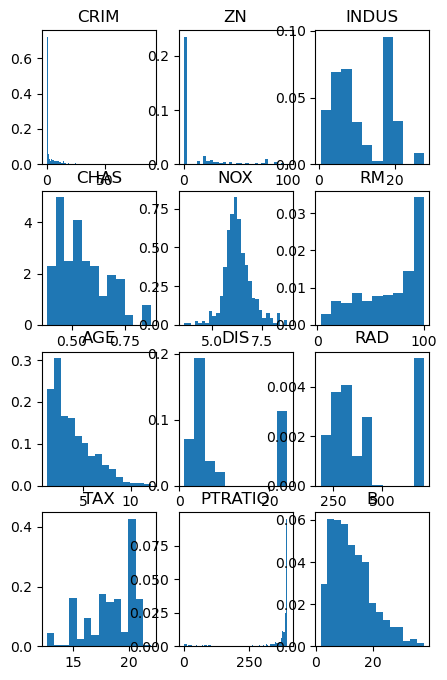

In [119]:
"""全ての特徴のヒストグラムを1枚の図にまとめ、比較を容易にする"""

import matplotlib.pyplot as plt
%matplotlib inline

flg,((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(5,8)) #元はfigsize=(10,15)
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
feature_names_new = np.delete(feature_names,3)
for n in range(0, len(axs)):
    axs[n].hist(samples_new[:,n:n+1], bins='auto', density=True)
    axs[n].set_title('{}'.format(feature_names[n]))

Text(0.5, 1.0, 'Right Skew')

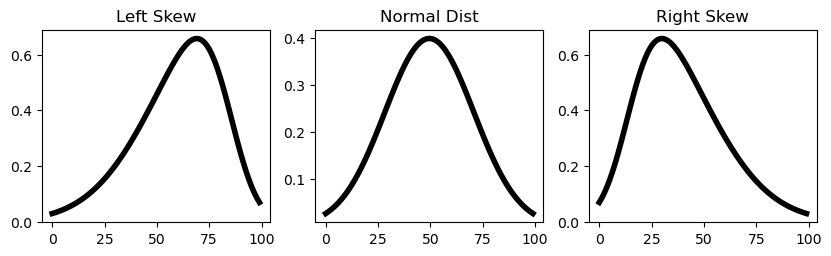

In [9]:
"""統計解析におけるモーメントとは、
基準点からの距離の期待値を定量的に表す指標
1次モーメント:平均値、2次モーメント:分散、3次モーメント:歪度（わいど）、平均に関する4次中央モーメント:尖度（せんど）
左に歪んでいる分布：分布の裾（外れ値）が左側にあるものを指す
"""
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import skewnorm

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,2.5))
x1 = np.linspace(skewnorm.ppf(0.01,-3), skewnorm.ppf(0.99,-3),100)
x2 = np.linspace(skewnorm.ppf(0.01,0), skewnorm.ppf(0.99,0),100)
x3 = np.linspace(skewnorm.ppf(0.01,3), skewnorm.ppf(0.99,3),100)
ax1.plot(skewnorm(-3).pdf(x1), 'k-', lw=4)
ax2.plot(skewnorm(0).pdf(x2), 'k-', lw=4)
# 正の歪度があり右に歪んでいる
ax3.plot(skewnorm(3).pdf(x3), 'k-', lw=4)
ax1.set_title('Left Skew')
ax2.set_title('Normal Dist')
ax3.set_title('Right Skew')

kurtosis ofMesokurtic
-0.02822576262937071
kurtosis ofLeptokurtic
2.5052084925255906
kurtosis ofPlatykurtic
-0.58907859767127


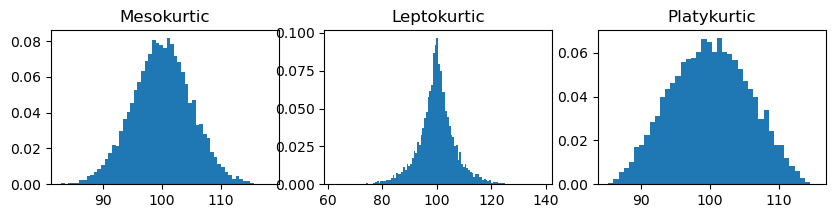

In [7]:
import scipy
from scipy import stats
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2))
axs = [ax1, ax2, ax3]
Titles = ['Mesokurtic', 'Leptokurtic', 'Platykurtic']
dist = scipy.stats.norm(loc=100, scale=5)
sample_norm = dist.rvs(size=10000)
dist2 = scipy.stats.laplace(loc=100, scale=5)
sample_laplace = dist2.rvs(size=10000)
dist3 = scipy.stats.cosine(loc=100, scale=5)
sample_cosine = dist3.rvs(size=10000)
samples = [sample_norm, sample_laplace, sample_cosine]

for n in range(0, len(axs)):
    axs[n].hist(samples[n], bins='auto', density=True)
    axs[n].set_title('{}'.format(Titles[n]))
    print("kurtosis of" + Titles[n])
    print(scipy.stats.describe(samples[n])[5])

In [15]:
"""
特徴の歪度と尖度の値を確認
どの特徴も歪度が正で右に歪んでいることがわかる

"""
samples, label, feature_names_new = dataset.data, dataset.target, dataset.feature_names
for n in range(0, len(feature_names_new)):
    kurt = scipy.stats.describe(samples[n])[5]
    skew = scipy.stats.describe(samples[n])[4]
    print(feature_names_new[n] + "-Kurtosis: {} Skewness: {}".format(kurt, skew))

CRIM-Kurtosis: 2.102090573040533 Skewness: 1.9534138515494224
ZN-Kurtosis: 2.8706349006925134 Skewness: 2.0753333576721893
INDUS-Kurtosis: 2.9386308786131767 Skewness: 2.1061627843164086
CHAS-Kurtosis: 3.47131446484547 Skewness: 2.2172838215060517
NOX-Kurtosis: 3.461596258869246 Skewness: 2.2086627738768234
RM-Kurtosis: 3.395079726813978 Skewness: 2.1917520072643533
AGE-Kurtosis: 1.9313625761956317 Skewness: 1.924572804475305
DIS-Kurtosis: 1.7633603556547106 Skewness: 1.8601991629604233
RAD-Kurtosis: 1.637076772210217 Skewness: 1.8266096199819994
TAX-Kurtosis: 1.7459544645159752 Skewness: 1.8679592455694167
PTRATIO-Kurtosis: 1.7375702020429316 Skewness: 1.8566444885400044
B-Kurtosis: 1.8522036606250456 Skewness: 1.892802610207445
LSTAT-Kurtosis: 1.9922400699409053 Skewness: 1.958159486723356
